# Artificial Neural Networks

This is a techniques created by Geoffrey Hinton in the 80's. "Deep" refers to all the hidden layers used in the Dynamic Programming algorithms. The green circles are Neurons.

<br> The Input Layer observations and Output refer to **ONE** row of data. Adjustment of the Weights (neuron synapses) is how NNs learn, they decide the strength and importance of signals that are passed along or blocked by an Activation Function.

<br>
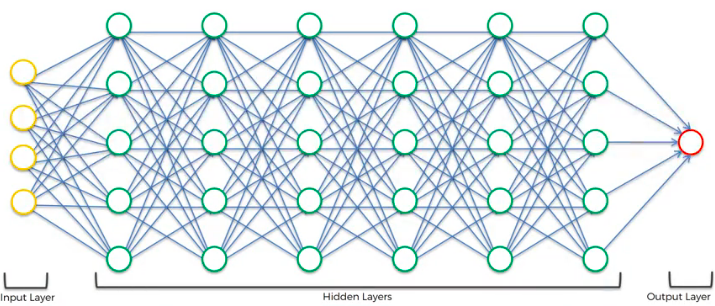
<br>
<br>
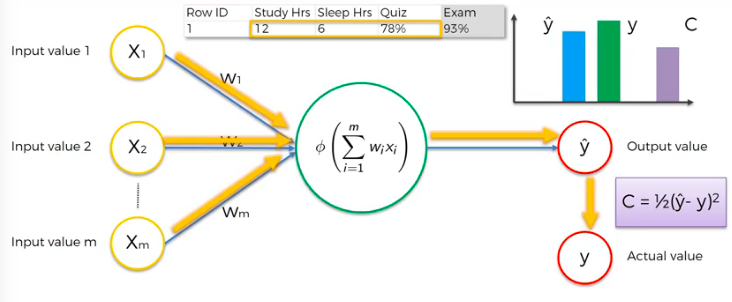
<br>

Input variable Feature Scaling (Standardize or Normalize) makes it easy for Neural Nets to process data by bringing their values close to eachother, read **Efficient BackPropagation.pdf**.


<br>
\begin{equation*}
X_{Standardized} = \frac{X - Min(X)}{Max(X) - Min(X)} 
\end{equation*}

<br>
$$
X_{Normalized} = \frac{X - μ (Mean)}{σ (Standard Deviation)} 
$$
<br>


# Activation Function

Here is a list of some NN Activation Functions. Read **Deep sparse rectifier neural networks.pdf**.
<br>
1. Threshold Function - Rigid binary style function
2. Sigmoid Function - Smooth, good for Output Layers that  predict probability
3. Rectifier Function - Gradually increases as Input Value increases
4. Hyperbolic Tangent Function - Similar to Sigmoid Function but values can go below zero
<br>


Activation | Functions 
- | - 
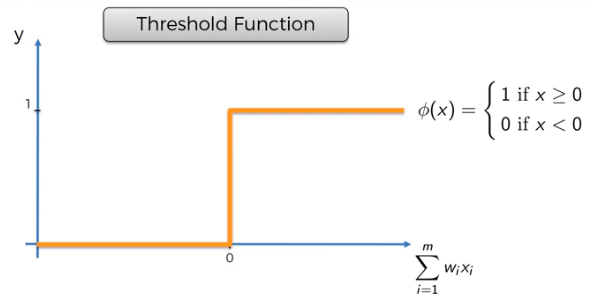 | 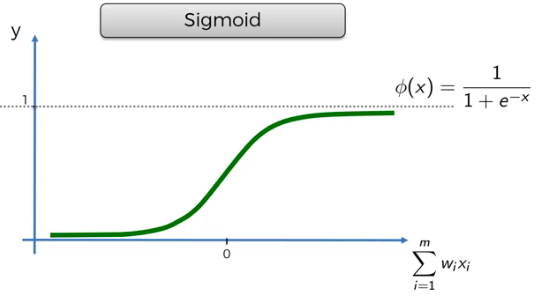 
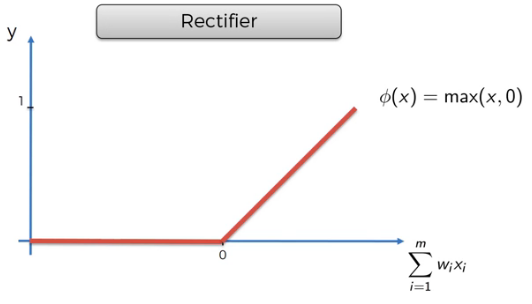 | 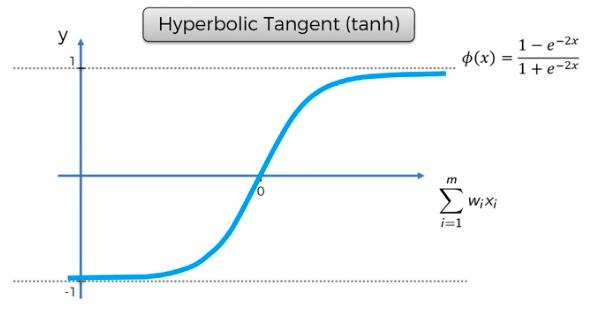

<br>
Different layers of a Neural Net can use different Activation Functions.
<br>

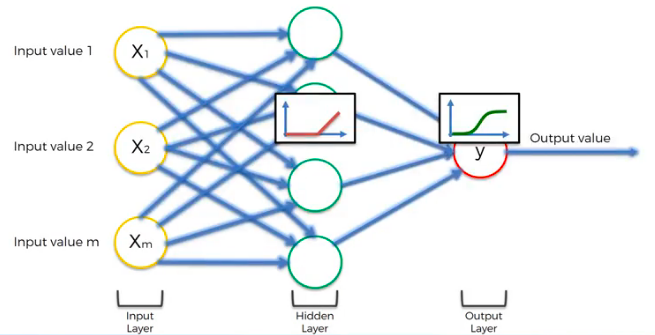


# Cost Function

The Cost Function is a plot of the differences between the target and the network's output, which we try to minimize through weight adjustments (Backpropagation) in epochs (one training cycle on the Training Set). Once Input information is fed through the network and a y_hat Output estimate is found (Forward-propagation), we take the error and go back through the network and adjust the weights (Backpropagation Algorithm). The most common cost function is the Quadratic (Root Mean Square) cost:

<br>
$$
Cost = \frac{(\hat y - y)^2}{2} = \frac{(Wighted Estimate - Actual)^2}{2} 
$$
<br>

Read this [Deep Learning Book](http://neuralnetworksanddeeplearning.com/index.html) and this [List of Cost Functions Uses](https://stats.stackexchange.com/questions/154879/a-list-of-cost-functions-used-in-neural-networks-alongside-applications?).


# Batch Gradient Descent

This is a Cost minimization technique that looks for downhill slopes and works on **Convex Cost Functions**.

1-D Gradient Descent | 2-D Gradient Descent | 3-D Gradient Descent
:------ | :------ | :------
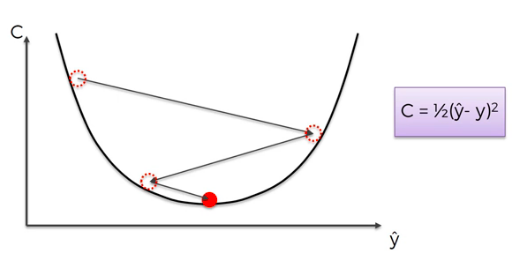 | 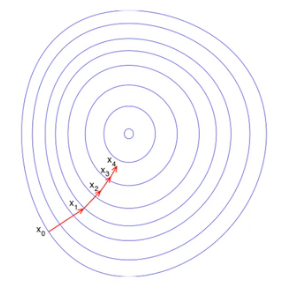 | 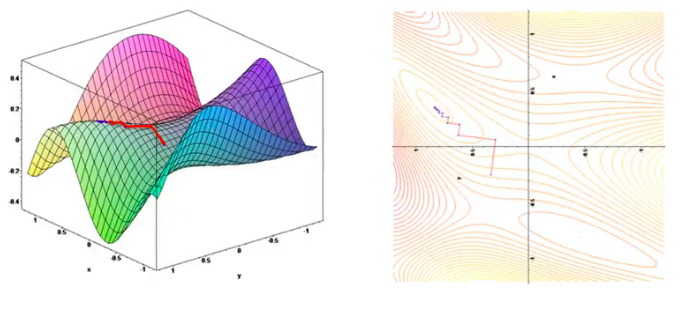


# Reinforcement Learning (Stochastic Gradient Descent)


This method is faster & more accurate than Batch Gradient Descent.
<br>
<br>
In order to avoid the Local Minimum trap, we can take more spuratic steps in random directions to increase the likelyhood of finding the Global Minimum. We can achieve this by adjusting Weights one Row at a time (Stochastic Gradient Descent) instead of all-at-once (Batch Gradient Descent). Read **Neural Network in 13 lines of Python**

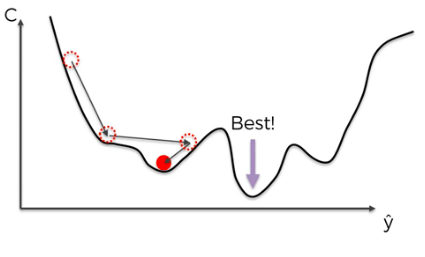

These are the steps for Stochastic Gradient Descent:
1. Initialize Weights to small numbers close to 0 (but NOT 0)
2. Input first row of Observation Data into Input Layer
3. Forward-propagate: Apply Weights to Inputs to get predicted result y_hat
4. Compute Error = y_hat - y_actual
5. Back-propagate: Update Weights according to the Learning Rate and how much they're responsible for the Error.
6. Repeat steps 1-5 after each observation (Reinforcement Learning), or after eatch batch (Batch Gradient Descent)
7. After Training Set passes through the Artificial Neural Network that's an Epoch. Redo more Epochs.


# Evaluating the ANN

Be careful when measuring the accuracy of a model. Bias and Variance can differ every time the model is evaluated. To solve this problem we can use K-Fold Cross Validation which splits the data into multiple segments and averages overall accuracy.

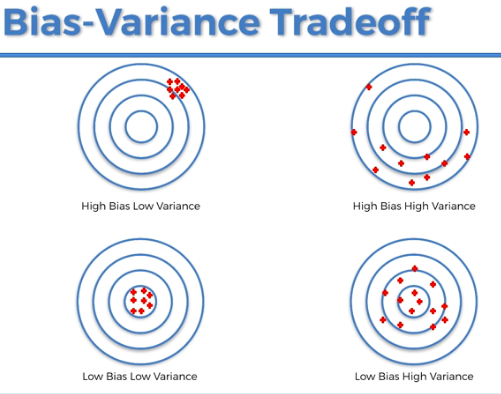

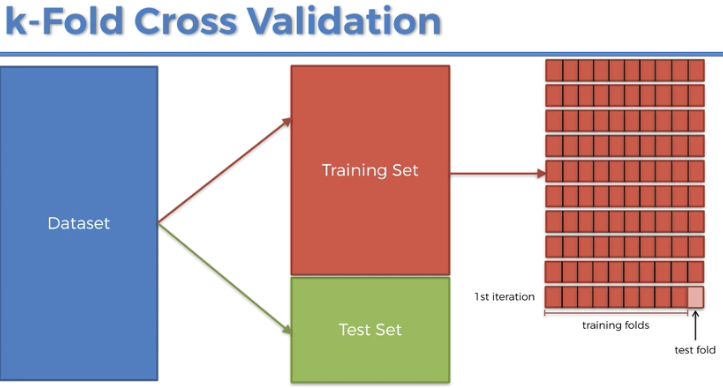



# Overfitting

This is when the Model is trained too much on the Training Set, this reduces performance on the Test Set. Spot Overfitting when:

1. Training and Test Accuracies have a large difference
2. Observing High Accuracy Variance when applying K-Fold Cross Validation

Solve Overfitting with "Dropout Regularization", this randomly disables Neurons through itterations so they don't grow too dependent on eachother. Thus the NN learns several independent correlations from the Data.


In [ ]:
# Artificial Neural Network
# Part 1 - Data Preprocessing

# Pip Install libraries in Terminal
# Install Theano (U. Montreal NumPy computation that can run on GPU or CPU, when parallel Float Point computation is important)
# Install Tensorflow (Google, same as above)
# Install Keras (Combines the above 2 libraries)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/Users/mac/Google Drive/Python & RasPi/Udemy Deep Learning/Deep Learning Code/Volume 1 - Supervised Deep Learning/Part 1 - Artificial Neural Networks (ANN)/Churn_Modelling.csv')
# Extract Independat Variables (Matrix of Features / Observations)
X = dataset.iloc[:, 3:13].values
# Extract Dependant Variables Vector
y = dataset.iloc[:, 13].values

# Encoding categorical (Dep/Indep) data
# We need to convert non-number data into numbers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# In the Bank example: Convert France/Germany/Spain into 0/1/2
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
# In the Bank example: Convert Female/Male into 0/1
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
# Since our country categorical data is not ordinal (order doesn't matter)
# We need to create a Dummy variable
onehotencoder = OneHotEncoder(categorical_features = [1])
# Make all Depedent X objects have the same type (Float 64)
X = onehotencoder.fit_transform(X).toarray()
# Remove  column to avoid Dummy Variable trap
X = X[:, 1:]

# Encoding the Dependent Variable
# In Bank example we dont need to encode Dependent variables because it's already Binary
# Uncomment to activate the following code
#labelencoder_y = LabelEncoder()
#y = labelencoder_y.fit_transform(y)


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Test_size = 0.2 means 80% of data for training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
# This steps Standardizes Input Data to ease computation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
# Artificial Neural Network
# Part 2 - Making the ANN

# Importing the Keras libraries and packages
import keras

# Required to initialize NN
from keras.models import Sequential

# Required to build Deep layers
from keras.layers import Dense

# Prevent Overfitting with Dropout Regularization
from keras.layers import Dropout

# Initialising the ANN Sequentially (can also initialize as Graph)
# We use Sequential because we have successive layers
# We call our NN "Classifier"
classifier = Sequential()

# Adding the input layer and the first hidden layerx
# This step initializes the Wights to small random numbers
# 'Units' is the number of hidden layers (begin with average of Input & Output layers = 11+1/2 = 6)
# 'Kernel_initializer': Initialize weights as small random numbers
# 'Input_dim': number Independent Variables
# 'Activation': Rectifier Activation Function ('relu') for Hidden Layers, Sigmoid Function for Output Layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Add Dropout Regularization to first layer to prevent Overfitting
# 'p': Fraction of Neurons to drop. Start with 0.1 (10% dropped) and increment by 0.1 until Overfitting is solved, don't go over 0.5
classifier.add(Dropout(p = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(p = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.add(Dropout(p = 0.1))

# Compiling the ANN
# 'optimizer': Algorithm used to find the best Weights. 'adam' is a popular Stochastic Gradient Descent Algorithm
# 'loss' = 'binary_crossentropy' is useful for Binary Outputs with logarithmic functions
# 'loss' = 'categorical_crossentropy' is useful for 3+ categorical Outputs
# 'metrics' =  Used to evaluate the ANN, requires list. We use 1 metric called 'accuracy'  
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
# Experiment to find best 'batch_size' and 'epochs'
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)


In [ ]:
# Artificial Neural Network
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
# This gives a vector of probablities of Customers leaving the bank
# You can rank the probabilities of customers most likely to leave the bank
y_pred = classifier.predict(X_test)
# Choose a threshold of which customers leave or stay (use 50% as a starting threshold)
# This line converts probabilities into True/False
y_pred = (y_pred > 0.5)


# Predicting a single new observation
# Predict if the customer with the following informations will leave the bank:
# Geography: France
# Credit Score: 600
# Gender: Male
# Age: 40
# Tenure: 3
# Balance: 60000
# Number of Products: 2
# Has Credit Card: Yes
# Is Active Member: Yes
# Estimated Salary: 50000
# sc.transform Feature Scales the new prediction so the model will understand it
# Set 1 element as a float64 to set all to float64
new_prediction = classifier.predict(sc.transform(np.array([[0.0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
new_prediction = (new_prediction > 0.5)


# Making the Confusion Matrix
# Tells you the number of correct vs. incorrect observations
# In the Confusion Matrix we get [1,1] + [2,2] Correct Predictions
# In the Confusion Matrix we get [1,2] + [2,1] Incorrect Predictions
# Compute accuracy = correct predictions / total predictions
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Measure accuracy percentage of the Training Set
accuracy = (cm[0,0] + cm[1,1])/2000*100


In [ ]:
# Artificial Neural Network
# Part 4 - Evaluating the ANN

# Evaluating the ANN
# Import K-Fold Cross Validation Libraries

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
# Set up NN as a function
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# 'estimator': Object used to fit the data
# 'X': Features of the Training set
# 'y': Target variable of Training set
# 'cv': Number of Train Test Folds for K-Fold Cross Validation, start with 10, check for low Bias
# 'n_jobs': How many CPU cores to use. Use '-1' to use all available CPU cores for parallel computation
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10, n_jobs = -1)
# We're looking for low Bias (means high Accuracy) & low Variance
# We will get 10 Accuracies
mean = accuracies.mean()
variance = accuracies.std()



In [ ]:
# Artificial Neural Network
# Part 5 - Improving and Tuning the ANN

# Dropout Regularization to reduce overfitting if needed
# GridSearch tries several Tuning Hyper Parameters to find the best ones

# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
# Try sklearn.grid_search if sklearn.model_selection doesn't work
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# This function has an input (Optimizer) so we can try different ones
# 'Adam' and 'rmsprop' (also good for RNN) are good optimizers for stochastic gradient descent
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
# Build NN Classifier, we will train with K-Fold Cross Validation
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [100, 500],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
# Fit Model to data using grid_search to try various Hyper Parameter
grid_search = grid_search.fit(X_train, y_train)
# Output best parameters
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_


# Convolutional Neural Networks

CNNs are good for pattern and feature detection, especially for image recognition. Follow these steps to set up a CNN:
1. Convolution
2. Max Pooling
3. Flattening
4. Full Connection

Check out [How to implement a neural network](http://peterroelants.github.io/posts/neural_network_implementation_intermezzo02/), [A Friendly Introduction to Cross-Entropy Loss](http://rdipietro.github.io/friendly-intro-to-cross-entropy-loss/) and read Papers 4-20.

Convolution is a function derived from two given functions by an integration that expresses how the shape of one is modified by the other.

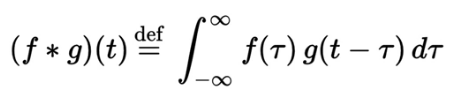

For Image recognition, we convolve the Input Image with Feature Detectors(aka Kernel or Filter) to generate a Feature Map (aka Convolved Map or Activation Map) which reveals and preserves patterns, also shrinks size for easier processing. This is done by element wise multiplication then addition of corresponding Image/Filter elements to generate the Feature Map. Multiple Feature Detectors create multiple Feature Maps.

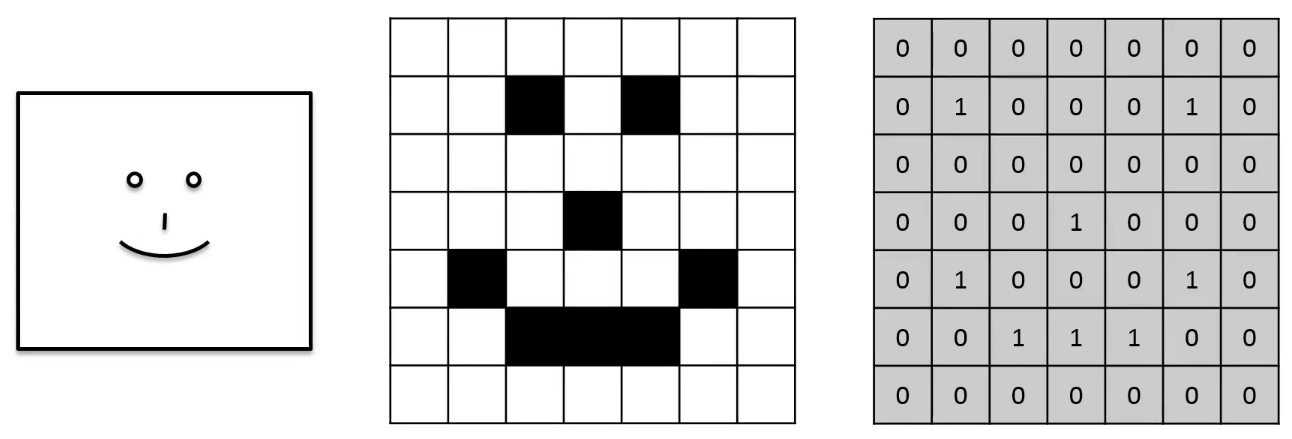

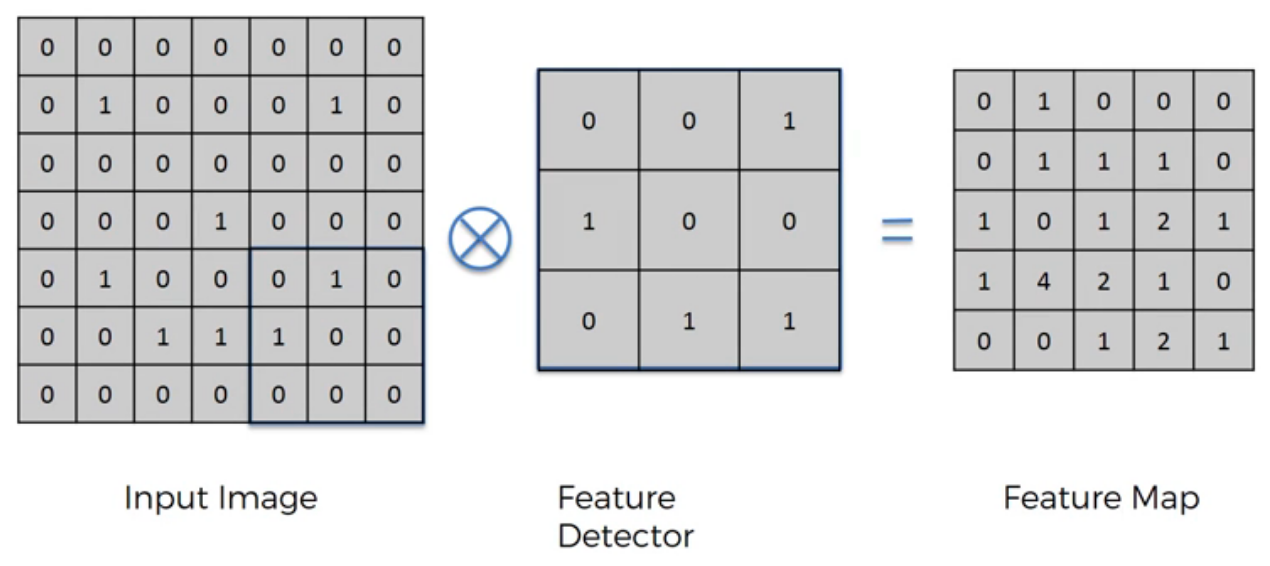

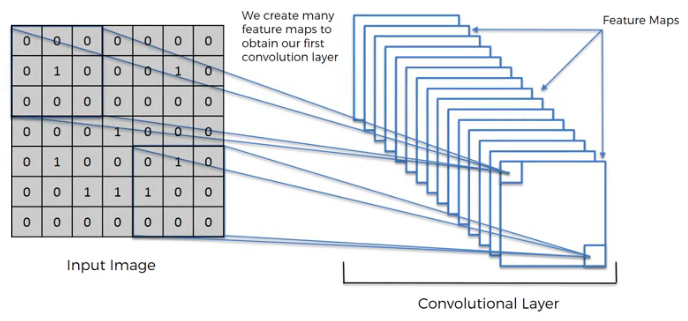

This [Image Convolution Guide](https://docs.gimp.org/en/plug-in-convmatrix.html) allows you to play with various filters applied to an image. Edge Detect is a useful filters in Machine Learning. AI creates filters not recognizable to humans, but it works for them. Feature Maps preserve spatial relationships between pixels.

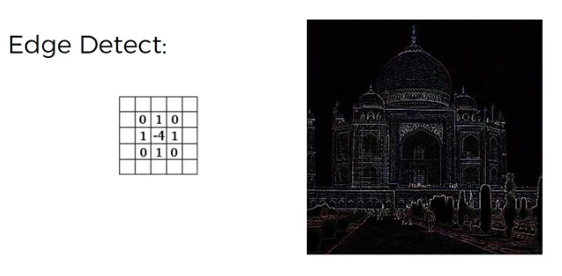


# Rectified Linear Units (ReLU)

This is an additional step for Convolution Neural Networks (using the Rectifier Function), it increases **Non-Liniearity** (breaks up linearity) in an image which is very important  for CNNs. Images are usually non-linear due to sharp transition of pixels, different colors, ets. 


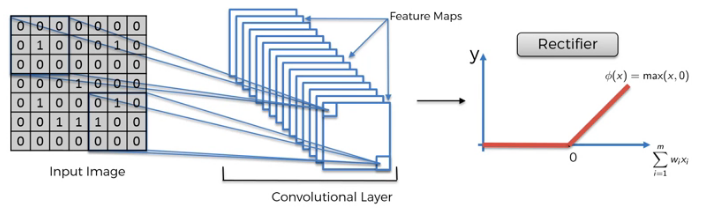

Before ReLU | After ReLU
- | -
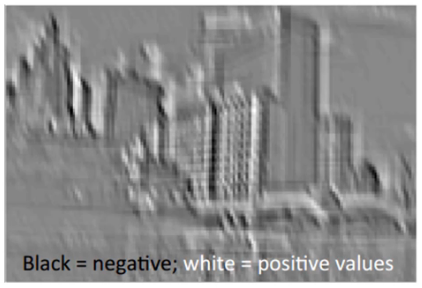 | 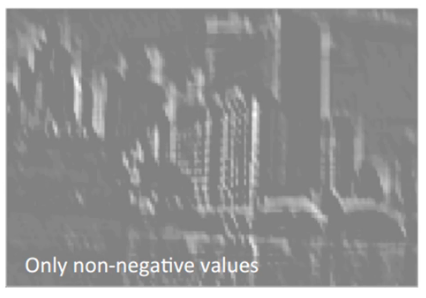

In the above example, the ReLU operation removed the Black Pixels so there's less white -> Gray -> Black transitions and borders now have more abrupt Pixel changes. Microsoft Argues that the following Modified Rectifier Function works better for this purpose.

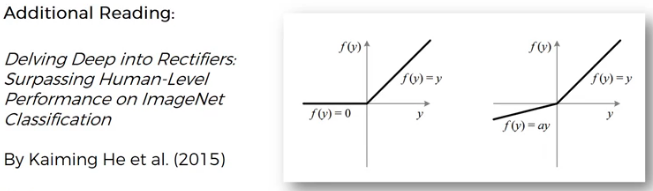


# Max Pooling (Different Types)

Max Pooling is when you take Max values of small grids in the Feature Map to create a **Pooled Feature Map**. Average Pooling (subsampling) takes average values of small grid.  It makes sure that your NN has **Spatial Invariance**, meaning it can find the learned features in the future even if they are slightly varried or distorted. Max Pooling provides resillience against slightly shifter or rotated Features. It also furthur distills (reduces size) Feature Maps while preserving Spatial Relations of pixels. Removing unneccesary information also helps prevent Overfitting. Read **Evaluation of Pooling Operations in Convolutional Architectures for Object Recognition.pdf**. Here is a [CNN Visualization Tool](http://scs.ryerson.ca/~aharley/vis/conv/flat.html)


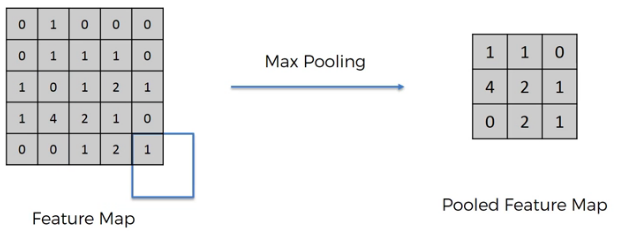


# Flattening

Flattening is putting the values of a Pooled Feature Map matrix into a 1-D vector. This makes it easy to put through an Artifial Neural Network.


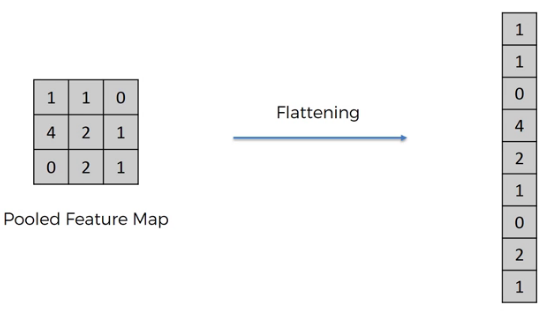

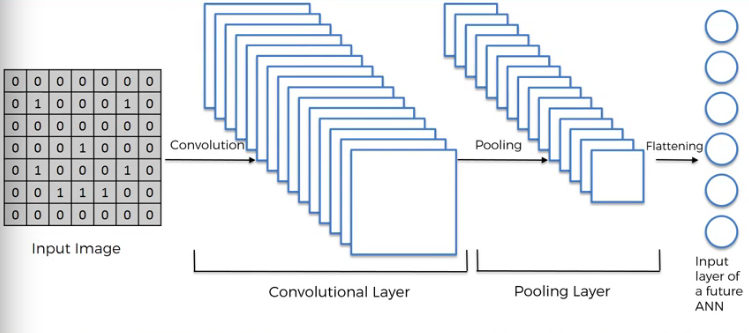



# Full Connection

This is when the output of a Convolutional Neural Network is Flattened and fed into a classic Artificial Neural Network. It's important to note that CNNs require **Fully Connected Hidden Layers** where as reguar ANNs don't neccessarily need Full Connections.

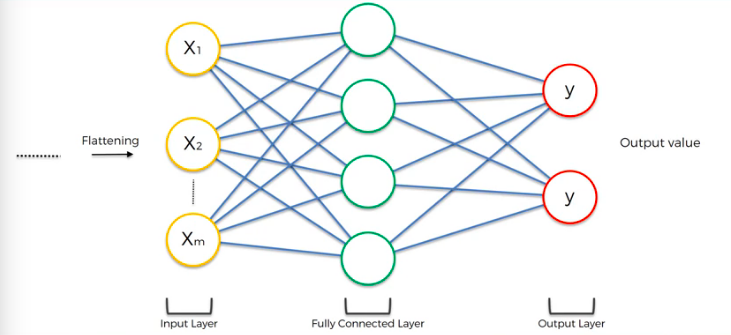

<br>
The Proccess of CNN Backpropagation adjusts Weights and also adjusts **Feature Maps**.

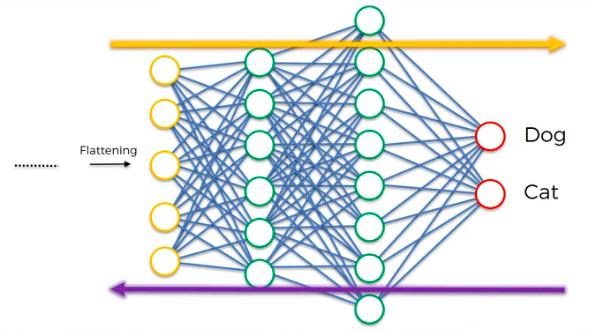

When it's time for the CNN to make a decision between Cat or Dog, the final layer Neurons putout their Votes (eg. Probability of Image being Cat) and the NN adjusts Votes according to the best Weights it has determined through Backpropagation.

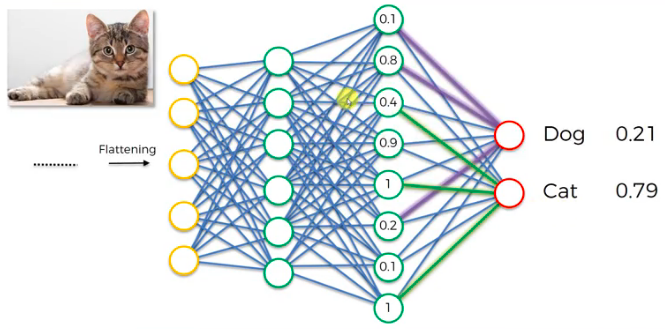

Here is a summary of every step of a CNN, don't forget about Rectifier Function to remove Linearity in Feature maps, also that the Hidden Layers are Fully Connected.

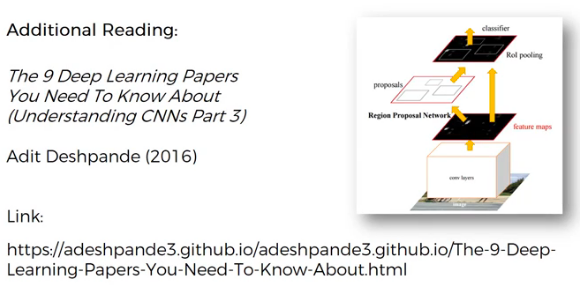


# Loss Function

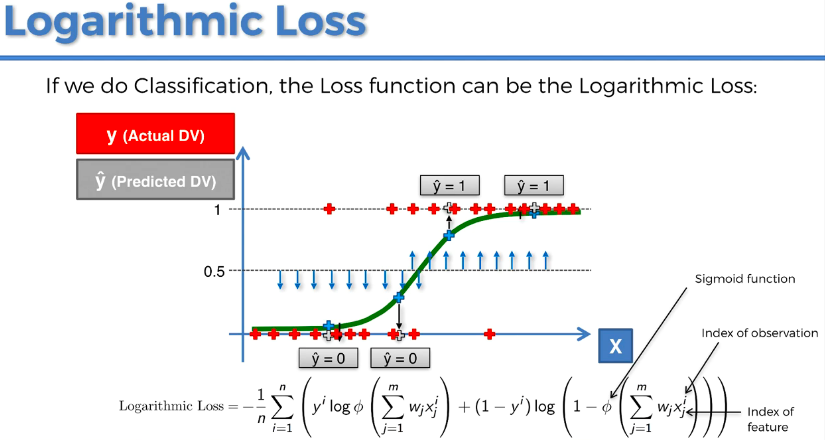

# PreProcessing (Image Augmentation)

This step modifies images to prevent over-fitting. This Data Augmentation trick can generate tons more Data by applying random modifications (shear, stretch, zoom, etc) to Data batches.


# Softmax & Cross-Entropy

Softmax Function shown below is used to make sure that the probabilities of the Output Layer add up to 1 (gives us a percentage guess). Watch this Geoffrey Hinton video about [SoftMax Function](https://www.youtube.com/watch?v=mlaLLQofmR8).


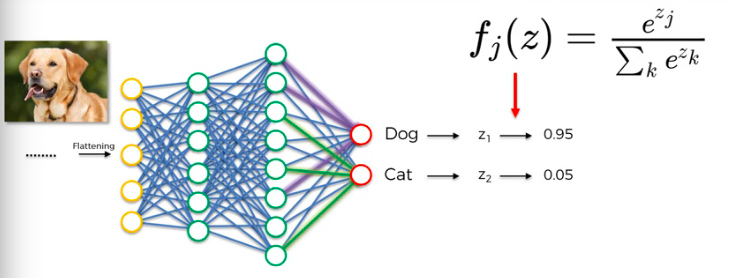


For Cost Function, we had previously used the Mean Squared Error  (MSE) Cost Function. For CNNs, it's better to use the Cross-Entropy Function as your **Loss Function** (aka Cost Function) shown below which we try to Minimize. We use Cross-Entropy as a Loss Function because it has a 'Log' term which helps amplify small Errors and better guide Gradient Descent.


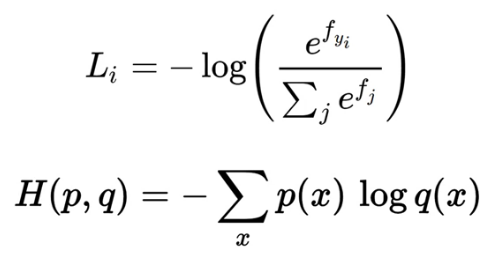


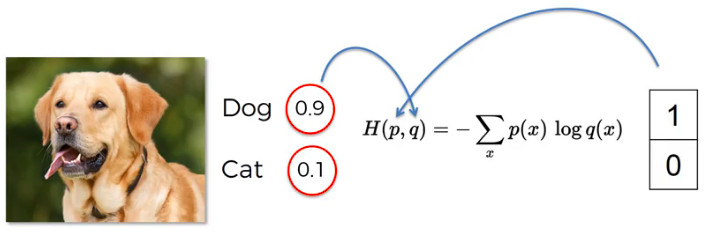


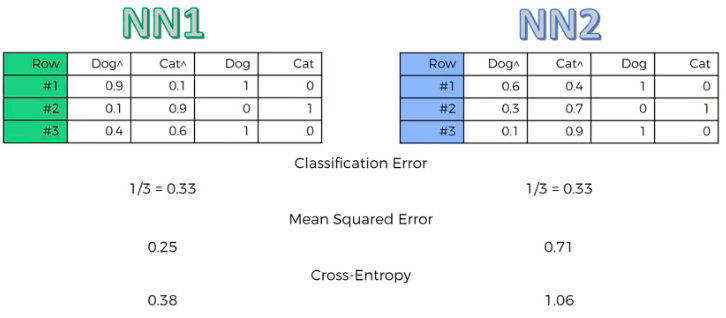


# CNN Improvements and Tuning

Besides Parameter Tuning to improve accuracy of Test Set, We can always add more Convolution Layers or add more Fulle Connectected Layers.



In [1]:
# Convolutional Neural Network
# Part 1 - Building the CNN

# Importing the Keras libraries and packages
# 'Sequential' library used to Initialize NN as sequence of layers (Alternative to Graph initialization)
from keras.models import Sequential
# 'Conv2D' for 1st step of adding convolution layers to images ('Conv3D' for videos with time as 3rd dimension)
from keras.layers import Conv2D
# 'MaxPooling2D' step 2 for pooling of max values from Convolution Layers
from keras.layers import MaxPooling2D
# 'Flatten' Pooled Layers for step 3
from keras.layers import Flatten
# 'Dense' for fully connected layers that feed into classic ANN
from keras.layers import Dense

# Initialising the CNN
# Calling this object a 'classifier' because that's its job
classifier = Sequential()

# Step 1 - Convolution
# Apply a method 'add' on the object 'classifier'
# Filter = Feature Detector = Feature Kernel
# 'Conv2D' (Number of Filters, (Filter Row, Filter Column), input shape of inputs = (3 color channels, 64x64 -> 256x256 dimension of 2D array in each channel))
# Start with 32 filters, work your way up to 64 -> 128 -> 256
# 'input_shape' needs all picture inputs to be the same shape and format (2D array for B&W, 3D for Color images with each 2D array channel being Blue/Green/Red)
# 'input_shape' parameter shape matters (3,64,64) vs (64,64,3)
# 'Relu' Rectifier Activation Function used to get rid of -ve pixel values and increase non-linearity
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
# Reduces the size of the Feature Map by half (eg. 5x5 turns into 3x3 or 8x8 turns into 4x4)
# Preserves Spatial Structure and performance of model while reducing computation time
# 'pool_size' at least needs to be 2x2 to preserve Spatial Structure information (context around individual pixels)
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer to improve performance
# Only need 'input_shape' for Input Layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
# Take all the Pooled Feature Maps and put them into one huge single Vector that will input into a classic NN
classifier.add(Flatten())

# Step 4 - Full connection
# Add some fully connected hidden layers (start with a number of Node between input and output layers)
# [Input Nodes(huge) - Output Nodes (2: Cat or Dog)] / 2 = ~128?...
# 'Activation' function makes sure relavent Nodes get a stronger vote or no vote
classifier.add(Dense(units = 128, activation = 'relu'))
# Add final Output Layer with binary options
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
# 'adam' Stochastic Gradient Descent optimizer
# 'loss' function. Logarithmic loss for 2 categories use 'binary_crossentropy' and 'categorical_crossentropy' for more objects
# 'metric' is the a performance metric
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

# Create random transformation from Data to increase Dataset and prevent overfitting
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# 'batch_size' is the number of images that go through the CNN every weight update cycle
# Increase 'target_size' to improve model accuracy 
training_set = train_datagen.flow_from_directory('/Users/mac/Google Drive/Python & RasPi/Udemy Deep Learning/Deep Learning Code/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/Users/mac/Google Drive/Python & RasPi/Udemy Deep Learning/Deep Learning Code/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 8000 images belonging to 2 classes.
Found 1999 images belonging to 2 classes.


In [2]:
# Train the model
# Increase 'epochs' to boost model performance
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)


Epoch 1/25
8000/8000 [==============================] - 10975s 1s/step - loss: 0.3722 - acc: 0.8242 - val_loss: 0.5651 - val_acc: 0.8071
Epoch 2/25
8000/8000 [==============================] - 4466s 558ms/step - loss: 0.1281 - acc: 0.9497 - val_loss: 0.9259 - val_acc: 0.8023
Epoch 3/25
8000/8000 [==============================] - 4387s 548ms/step - loss: 0.0643 - acc: 0.9764 - val_loss: 1.1272 - val_acc: 0.7995
Epoch 4/25
8000/8000 [==============================] - 4394s 549ms/step - loss: 0.0458 - acc: 0.9840 - val_loss: 1.1933 - val_acc: 0.7968
Epoch 5/25
8000/8000 [==============================] - 3785s 473ms/step - loss: 0.0354 - acc: 0.9878 - val_loss: 1.3235 - val_acc: 0.7825
Epoch 6/25
8000/8000 [==============================] - 2154s 269ms/step - loss: 0.0289 - acc: 0.9903 - val_loss: 1.7144 - val_acc: 0.7619
Epoch 7/25
8000/8000 [==============================] - 2155s 269ms/step - loss: 0.0251 - acc: 0.9918 - val_loss: 1.4543 - val_acc: 0.7939
Epoch 8/25
8000/8000 [=======

In [4]:
# Save model to file
# Architecture of the model, allowing to re-create the model
# Weights of the model
# Training configuration (loss, optimizer)
# State of the optimizer, allowing to resume training exactly where you left off
classifier.save('../CNN_Cat_Dog_Model.h5')

# Examine model
classifier.summary()

# Examine Weights
classifier.weights

# Examine Optimizer
classifier.optimizer


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total para

In [ ]:
# Load saved Model
from keras.models import load_model

model = load_model('../CNN_Cat_Dog_Model.h5')

In [10]:
# Part 3 - Making new predictions

# Numpy used for preprocessing
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/Users/mac/Google Drive/Python & RasPi/Udemy Deep Learning/Deep Learning Code/Volume 1 - Supervised Deep Learning/Part 2 - Convolutional Neural Networks (CNN)/dataset/single_prediction/cat_or_dog_3.jpg', target_size = (64, 64))
# Add a 3rd Color dimention to match Model expectation
test_image = image.img_to_array(test_image)
# Add one more dimension to beginning of image array so 'Predict' function can recieve it (corresponds to Batch, even if only one batch)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
# We now need to pull up the mapping between 0/1 and cat/dog
training_set.class_indices
# Map is 2D so check the first row, first column value
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
# Print result

print("The model class indices are:", training_set.class_indices)

print("\n" + prediction)


The model class indices are: {'cats': 0, 'dogs': 1}

dog


# Recurrant Neural Networks

As we try to model Machine Learning to behave like brains, weights represent Long Term Memory in the Temporal Lobe.
<br><br>
Recognition of patterns and images is done by the Occipital Lobe which is like CNNs.
<br><br>
RNNs are like Short Term Memory which remember recent memory and can create context like the Frontal Lobe.
<br><br>
Parietal lobe is responsible for spacial recognition like Botlzman Machines.
<br><br>
RNNs connect Neurons to themselves through time, creating a feedback look and Short Term Memory like awareness.

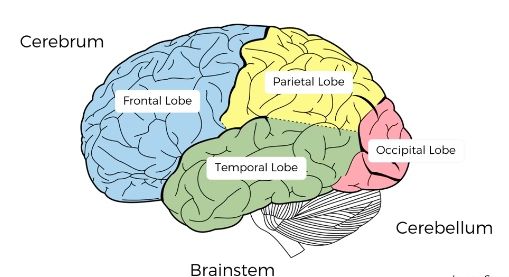

The following diagram represents the old-school way to represent RNNs, which shows a Feedback Loop (Temporal Loop) structure that connects Hidden Layers to themselves AND the Output Layer which gives them a Short Term Memory. Each layer represents reseval Nodes.

Compact Form | Expanded Form
- | -
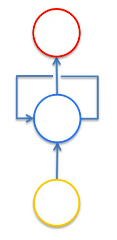 | 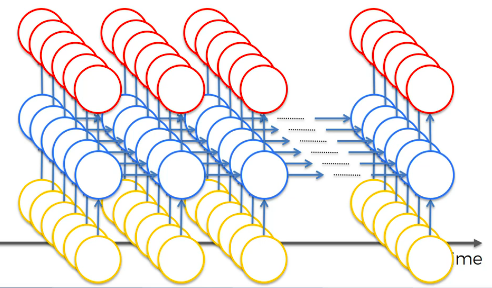


A more modern representation shows the following RNN types and use examples: 
1. One-To-Many: Computer description of an image. CNN used to classify images and then RNN used to make sense of images and generate context.

2. Many-To-One: Sentiment Analysis of text (gague the positivity or negativity of text)

3. Many-to-Many: Google translate of language who's vocabulary changes based on the gender of the subject. Also subtitling of a movie.


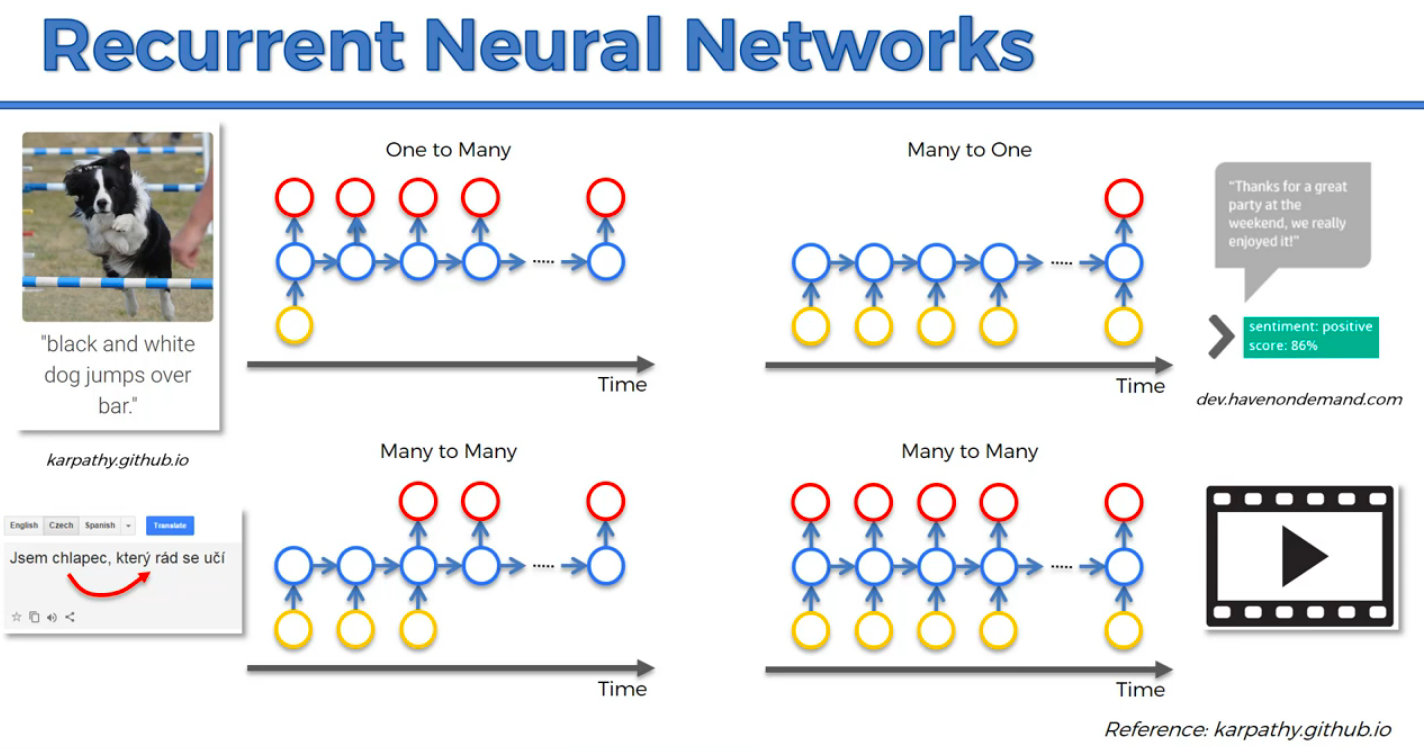


Check out Andrej Karpathy's Blog (Director of AI at Tesla) on [Github](http://karpathy.github.io/) and [Medium](https://medium.com/@karpathy/).
<br><br>
Here is the movie [Sunspring by Benjamin the LSTM Recurrant Neural Network AI](https://www.youtube.com/watch?v=LY7x2Ihqjmc)


# RNN Exploding/Vanishing Gradient Problem

The gradient is used to update the weights in an RNN looking back a certain number of user defined steps.
<br><br>
The lower the gradient, the harder it is to update the weights (vanishing gradient) of nodes furthur back in time. Especially because previous layers are used as inputs for future layers.
<br><br>
So old Neurons are training much slower that more current Neurons. It's like a domino effect.

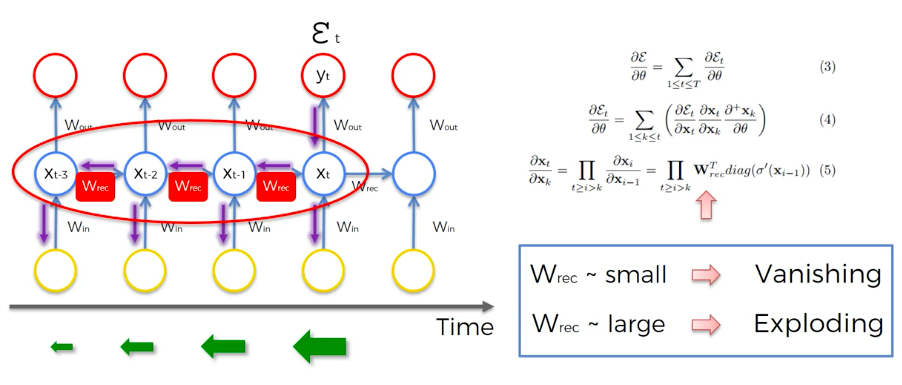


# Exploding Gradient Solutions

**1. Truncated Backpropagation**
<br>
Stop backprop after a certain point (not an optimal because not updating all the weights). Better than doing nothing which can produce an irrelavent network.

**2. Penalties**
<br>
The gradient can be penalized and artificially reduced.

**3. Gradient Clipping**
<br>
A maximum limit for the gradient which stops it from rising more.


# Vanishing Gradient Solutions

**1. Weight Initialization**
<br>
You can be smart about how you initialize weights to minimize the vanishing gradient problem.

**2. Echo State Network**
<br>
Designed to solve vanishing gradient problem. It's a recurrent neural network with a sparsely connected hidden layer (with typically 1% connectivity). The connectivity and weights of hidden neurons are fixed and randomly assigned.

**3. Long Short-Term Memory Networks (LSTM)**
<br>
Most popular RNN structure to tackle this problem


# LSTM

**History**
<br>
When the weight of an RNN gradient 'W_rec' is less than 1 we get Vanighing Gradient, when 'W_rec' is more than 1 we get Exploding Gradient. So why not set W_rec = 1.

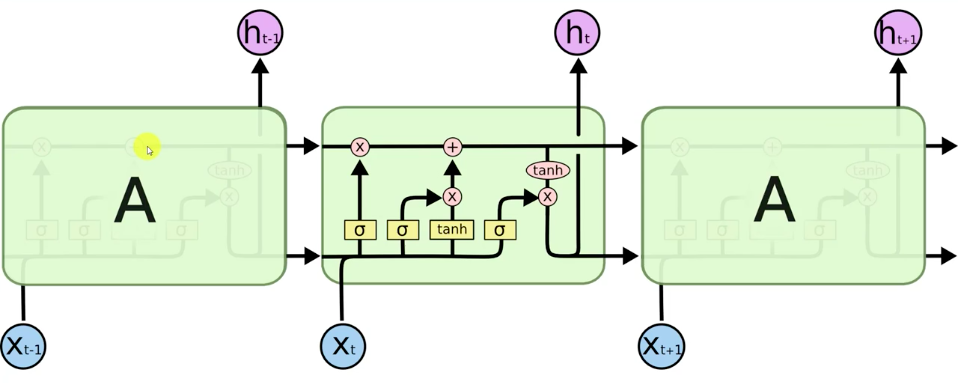

Circles represent Layers (Vectors).
<br>
**'C'** represents Memory Cells Layers
<br><br>
**'h'** represents Output Layers (Hidden States)
<br><br>
**'X'** represents Input Layers
<br><br>
**Lines** represent values being transferred.
<br><br>
**Concatenated** lines represent pipelines running in parallel.
<br><br>
**Forks** are when Data is copied.
<br><br>
**Pointwise Element-by-Element Operation (X)** represents valves (from left-to-right: Forget Valve, Memory Valve, Output Valve). Valves can be open, closed or partially open as decided by an Activation Function.
<br><br>
**Pointwise Element-by-Element Operation (+)** represent a Tee pipe joint, allowing stuff through if the corresponding valve is activated.
<br><br>
**Pointwise Element-by-Element Operation (Tanh)** Tangent function that outputs (values between -1 to 1)
<br><br>
**Sigma Layer Operation** Sigmoid Activation Function (values from 0 to 1)
<br><br>

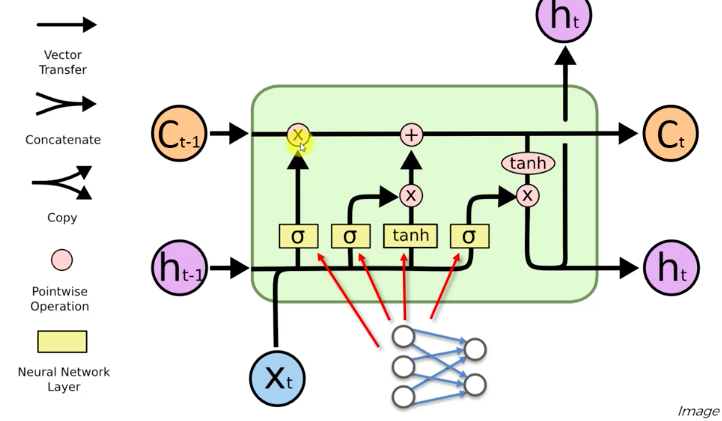



# LSTM Step 1

New Value (X_t) and value from Previous Node (h_t-1). Together they decide if the Forget Valve should be opened or closed (Sigmoid).

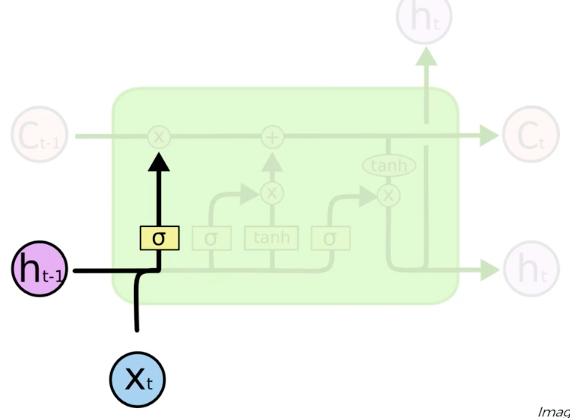


# LSTM Step 2

New Value (X_t) and value from Previous Node (h_t-1). Together they decide if the Memory Valve should be opened or closed (Sigmoid). To what extent to let values through (Tanh from -1 to 1).

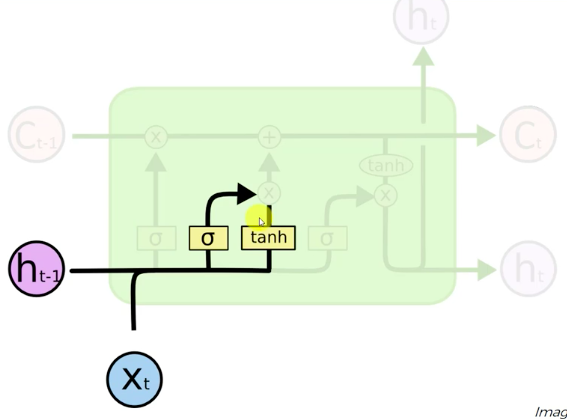


# LSTM Step 3

Decide the extent to which a Memory Cell (C_t) should be updated from the previous Memory Cell (C_t-1). Forget and Memory Valves used to decide this. You can update Memory completely, not at all or only partially.

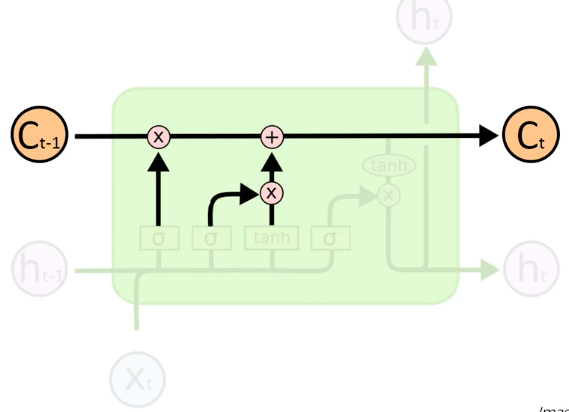


# LSTM Step 4

New Value (X_t) and value from Previous Node (h_t-1) decides which part of the Memory Pipeline (and to what extent) will be used as an Output (h_t).

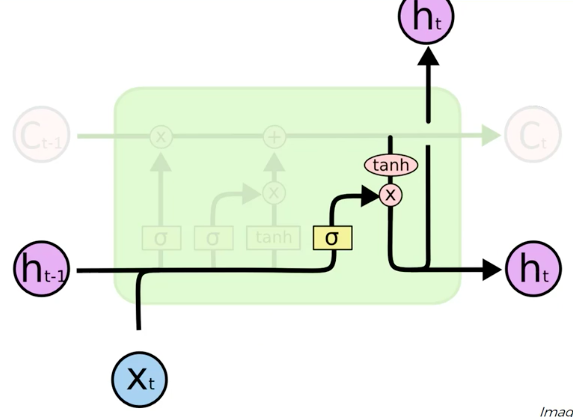


# LSTM Variation 1 (Add Peep holes)

Sigmoid Layer Activation Functions now have additional information about the current state of the Memory Cell. So Valve decisions are made, taking into account Memory Cell State.

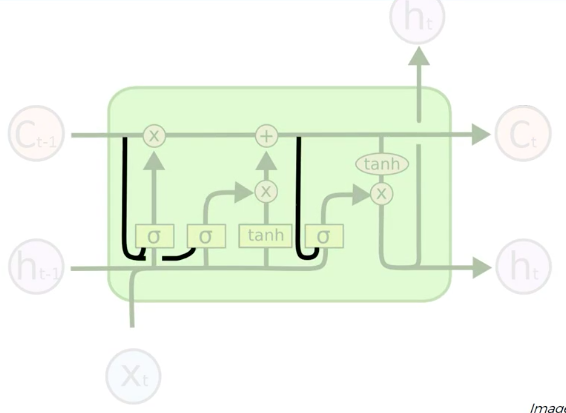


# LSTM Variation 2 (Connect Forget & Memory Valves)

Forget and Memory Valves can make a combined decision. They're conncected with a '-1' multiplier so one opens when the other closes.

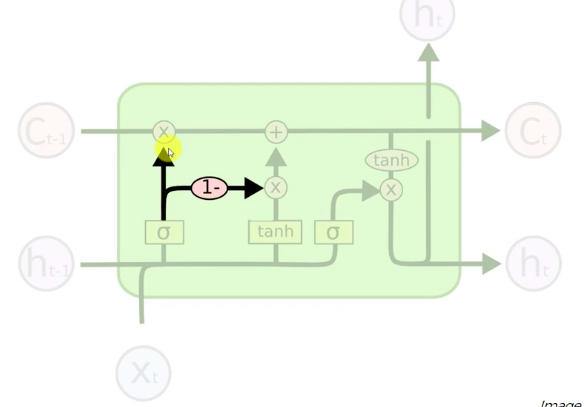


# LSTM Variation 3 (GRU: Gated Recurring Units)

The Memory Pipeline is replaced by the Hidden Pipeline. Simpler but less flexible in terms of how many things are being monitored and controlled.

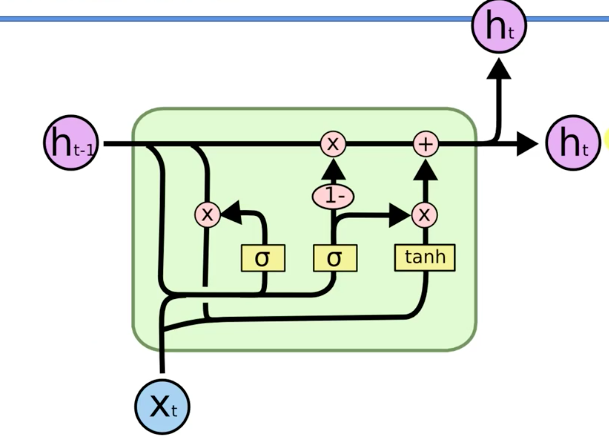


In [ ]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
# '.values' need the 2nd Column Opening Price as a Numpy array (not vector)
# '1:2' is used because the upper bound is ignored
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
# Use Normalization (versus Standardization) for RNNs with Sigmoid Activation Functions
# 'MinMaxScalar' is a Normalization Library
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps (look back 60 days) and 1 output
# This tells the RNN what to remember (Number of timesteps) when predicting the next Stock Price
# The wrong number of timesteps can lead to Overfitting or bogus results
# 'x_train' Input with 60 previous days' stock prices
X_train = []
# 'y_train' Output with next day's stock price
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping (add more dimensions)
# This lets you add more indicators that may potentially have corelation with Stock Prices
# Keras RNNs expects an input shape (Batch Size, Timesteps, input_dim)
# '.shape[0]' is the number of Rows (Batch Size)
# '.shape[1]' is the number of Columns (timesteps)
# 'input_dim' is the number of factors that may affect stock prices
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [ ]:
# Part 2 - Building the RNN
# Building a robust stacked LSTM with dropout regularization

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
# Regression is when you predict a continuous value
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
# Not need to specify input_shape for second Layer, it knows that we have 50 Neurons from the previous layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# 'X_train' Independent variables
# 'y_train' Output Truths that we compare X_train to.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


In [ ]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'
# 'axis = 0' for Vertical Concatenation to add rows to the bottom
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
# Extract Stock Prices for Test time period, plus 60 days previous
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
# 'reshape' function to get it into a NumPy format
inputs = inputs.reshape(-1,1)
# Inputs need to be scaled to match the model trained on Scaled Feature
inputs = sc.transform(inputs)
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
# We need a 3D input so add another dimension
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = regressor.predict(X_test)
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()


# K-Means Clustering Algorithm

This algorithm discovers categories and groups in data. K-Means Clustering can work with an arbitrary number of dimensions. The following is an example of clustering a 2-D dataset.<br>


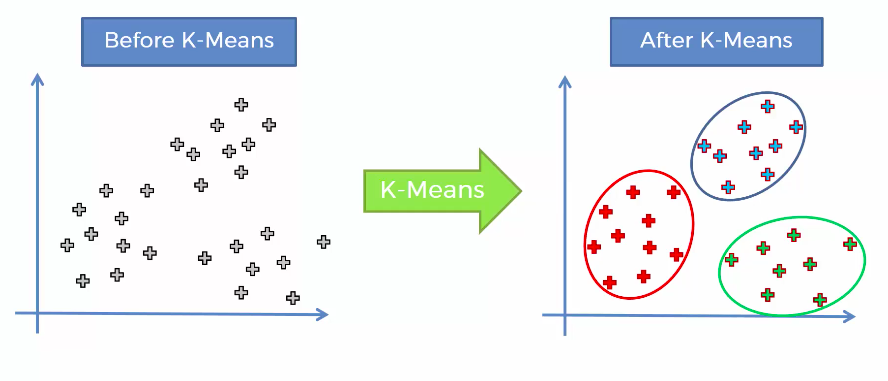

**Step 1**<br>
Choose the number of K clusters.
<br>

**Step 2**<br>
Select at random 'K' points to be the Centroid of clusters (not necessarily from the dataset.) A Centroid acts as a Center of Gravity for a group of Data with various weights.
<br>

**Step 3**<br>
Assign each datapoint to the closestCentroid. This forms 'K' clusters. You can choose Euclidian Geometric Distance, Norm 1 Distance, etc. 
<br>

**Step 4**<br>
Compute and place the new Centroid of the cluster
<br>

**Step 5**<br>
Reassign each data point to the new closest Centroid (Step 3). If any reassignmnet took place go to step 4, otherwised FINISH. Algorithm has converged and model is ready.
<br>



**Random Inititialization Trap** is when the clustering results can be affected by which starting points. To solve this use robust tools like **K-Means++**.<br>

**Correct Number of Clusters** can be done by quantifying theperformance of a cluster number using the **Within Clusters Sum of Squares (WCSS)** metric to do this. WCSS finds the sum of distances from Centroids to their corresponding data points. Smaller WCSS is better as it shows distances of points to their Centroids is small. The following example shows that 3 is the best number of Centroids as it produces the lowest WCSS.

<img src = "55%20-%20K-Means%20WCSS.png" width = "600">

<img src = "56%20-%20K-Means%20WCSS%20Optimal.png" width = "600">


# Unsupervised Self Organizing Maps (SOM)

SOMs are used to reduce dimensionality. Reducing the number of colums into a single Column (2D). SOMs don't need labels.
1. SOMs figure out similarities between elements of a large complex dataset.
2. SOMs retain topology (similarity) of Input Set
3. SOMs figure out correraltions and features that aren't easily identified
4. ClassifyData without supervision
5. No Target Vector (Error) to Backpropagate
6. No lateral connction between Output Nodes.


**Weights have a different meaning in SOMs** than in previously studied ANNs. In ANNs weights are multiplied by Input Layer values, added up and fed into an activation function. **SOMs don't use an Activation Functions, weights are a characteristic of the Nodes itself!** Weights are the co-ordinates of the nodes (eg. (x,y,z) for a 3D dataset with 2 Columns). <br><br>

We create imaginary Nodes with random co-ordinates in the Dataset. Then we put them in competition to find the Node closest to a Row in the Dataset by using the Euclidian Distance Formula. The closest Node is called BMU (Best Matching Unit)


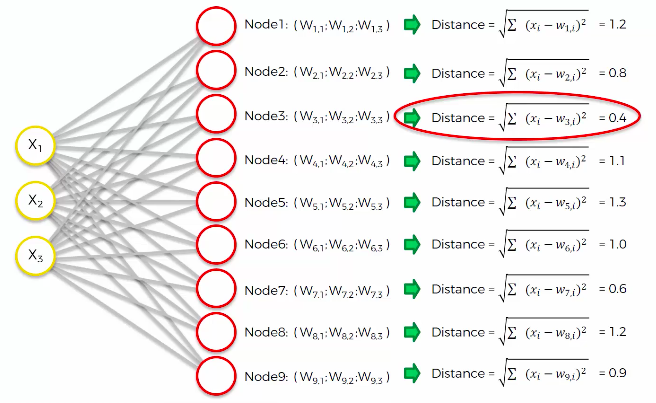

The map is self-organizing to match yout Data Input. Dragging BMUs and nearby points closer to the Data. Points closer to the BMU are pulled harder. <br><br>

For every Epoch itteration the radius of BMU's pull is reduced, thus increasing the precision of masking/matching the SOM to your Data. Check out [AI Junky SOM Example](http://www.ai-junkie.com/ann/som/som2.html)


<img src = "53%20-%20SOM%20Visual.png" width = "600">

<img src = "54%20-%20SOM%20Visual%202.png"  width = "400">





